In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
df=pd.read_csv("Cars.csv")

In [4]:
df.shape


(81, 5)

In [5]:
df.columns


Index(['HP', 'MPG', 'VOL', 'SP', 'WT'], dtype='object')

In [6]:
df.describe()

,HP,MPG,VOL,SP,WT
count,81.000000,81.000000,81.000000,81.000000,81.000000
mean,117.469136,34.422076,98.765432,121.540272,32.412577
std,57.113502,9.131445,22.301497,14.181432,7.492813
min,49.000000,12.101263,50.000000,99.564907,15.712859
25%,84.000000,27.856252,89.000000,113.829145,29.591768
50%,100.000000,35.152727,101.000000,118.208698,32.734518
75%,140.000000,39.531633,113.000000,126.404312,37.392524
max,322.000000,53.700681,160.000000,169.598513,52.997752


In [7]:
df.isna().sum()

HP     0
MPG    0
VOL    0
SP     0
WT     0
dtype: int64

In [8]:
df.dtypes

HP       int64
MPG    float64
VOL      int64
SP     float64
WT     float64
dtype: object

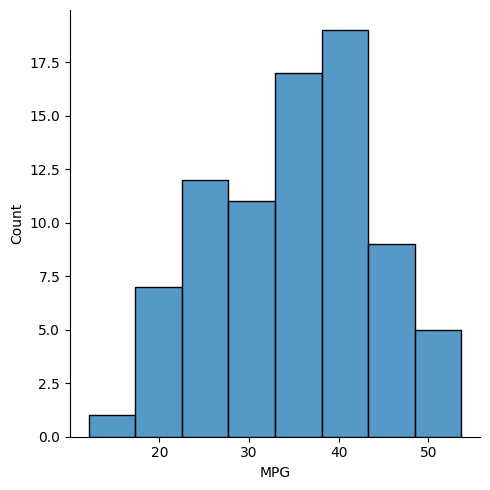

In [9]:
sns.displot(df["MPG"])

# LINEARITY

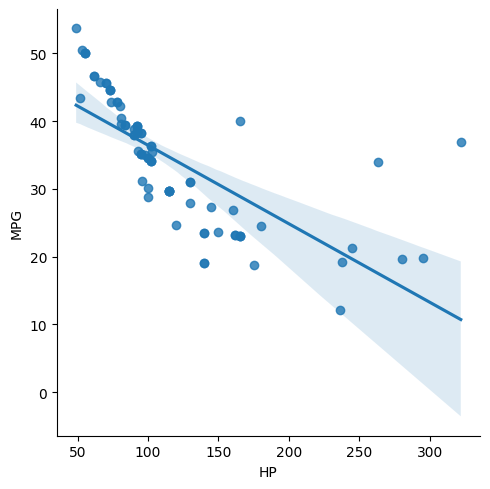

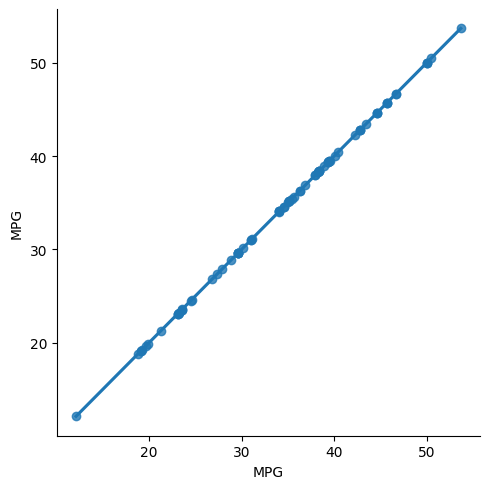

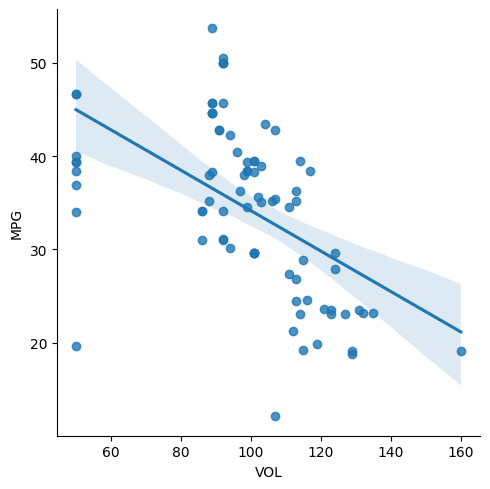

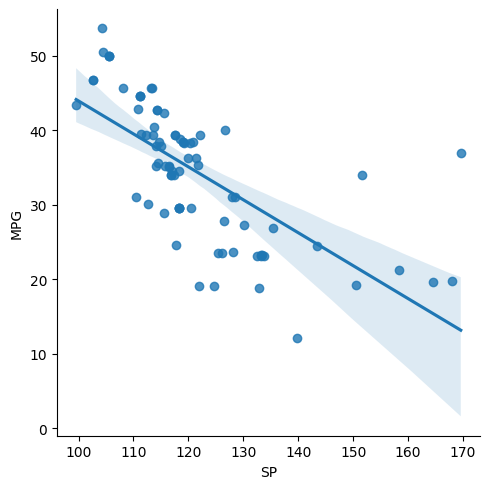

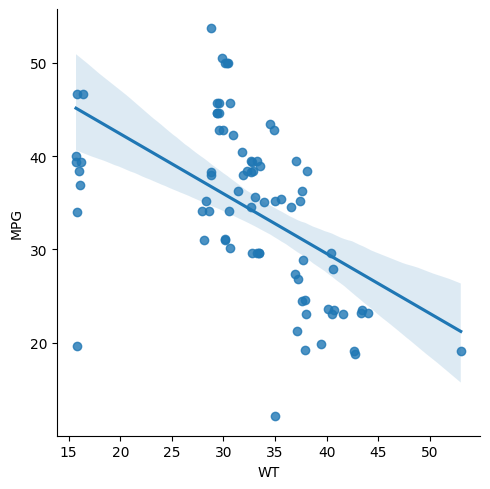

In [14]:
for i in (df.columns):
    print(sns.lmplot(data=df,x=i,y="MPG"))
    
    plt.show()

# MULTICOLINEARITY

In [20]:
df.corr()

,HP,MPG,VOL,SP,WT
HP,1.000000,-0.725038,0.077459,0.973848,0.076513
MPG,-0.725038,1.000000,-0.529057,-0.687125,-0.526759
VOL,0.077459,-0.529057,1.000000,0.102170,0.999203
SP,0.973848,-0.687125,0.102170,1.000000,0.102439
WT,0.076513,-0.526759,0.999203,0.102439,1.000000


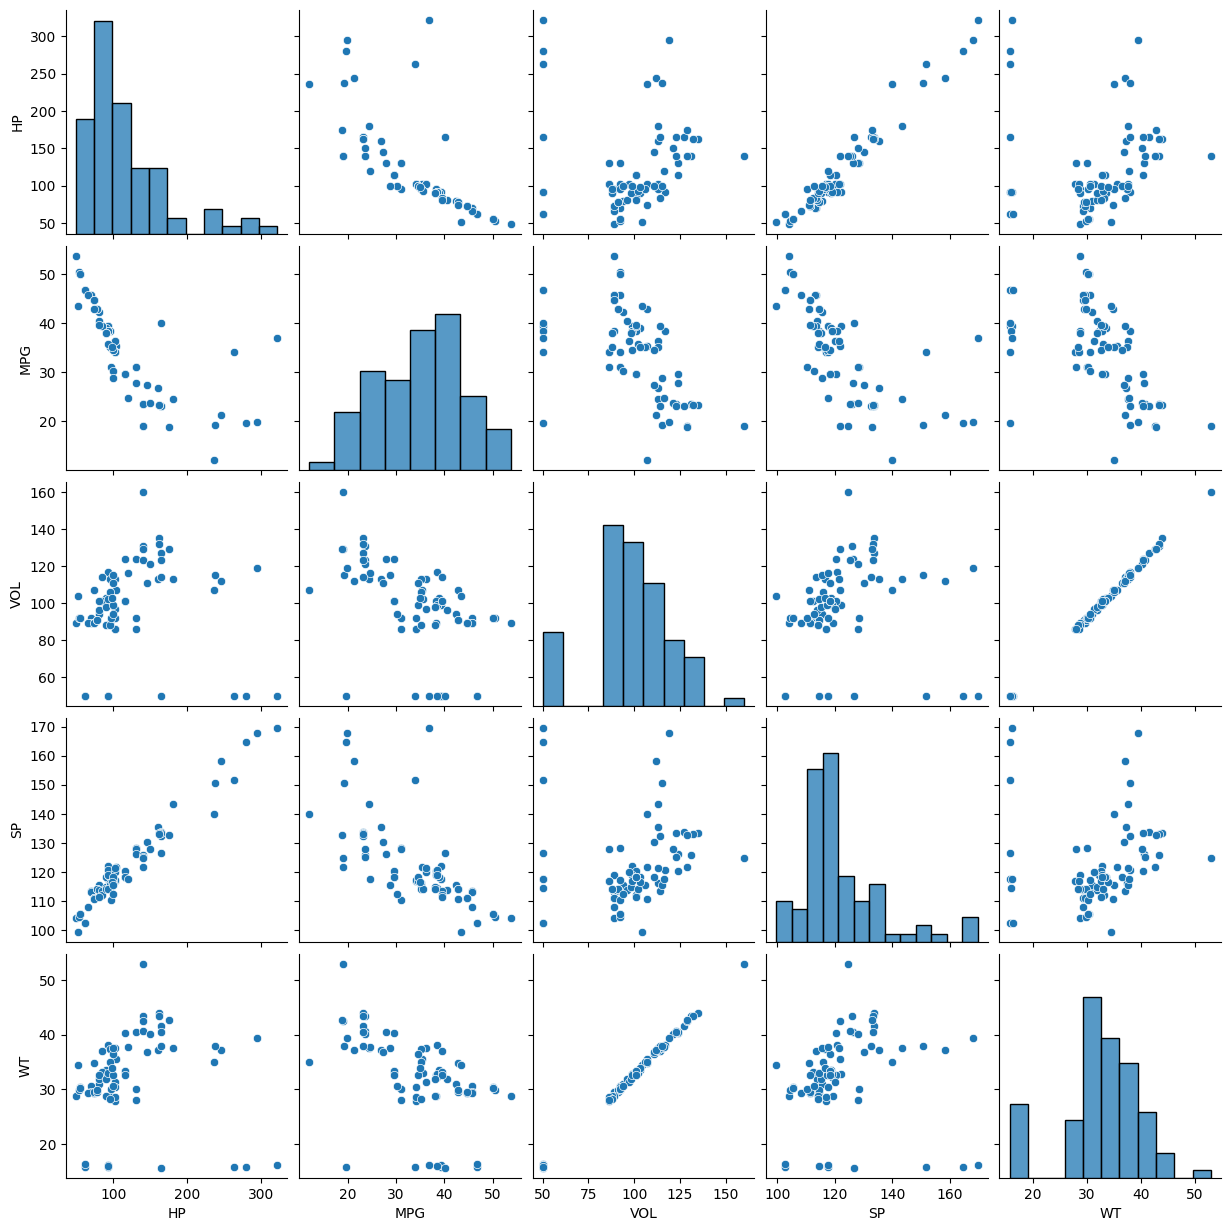

In [27]:
sns.pairplot(df)

<Axes: >

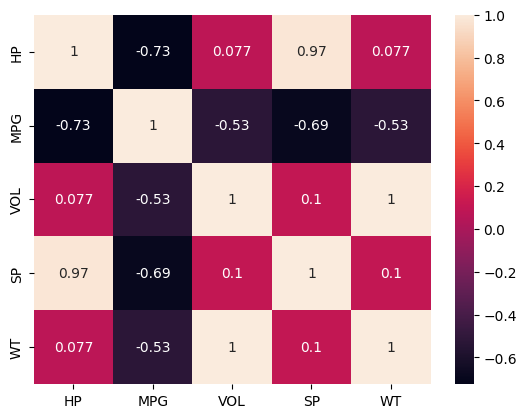

In [25]:
sns.heatmap(df.corr(),annot=True)

# FINDING X AND Y

In [16]:
y=df["MPG"]

In [17]:
x=df.drop(["MPG"],axis=1)

In [18]:
x

,HP,VOL,SP,WT
0,49,89,104.185353,28.762059
1,55,92,105.461264,30.466833
2,55,92,105.461264,30.193597
3,70,92,113.461264,30.632114
4,53,92,104.461264,29.889149
...,...,...,...,...
76,322,50,169.598513,16.132947
77,238,115,150.576579,37.923113
78,263,50,151.598513,15.769625
79,295,119,167.944460,39.423099


# MODEL BUILDING

In [31]:
from sklearn.linear_model import LinearRegression

In [32]:
from sklearn.metrics import mean_absolute_error,r2_score

In [33]:
model=LinearRegression()

In [34]:
model.fit(x,y)

LinearRegression()

## FINDINGS

In [35]:
model.coef_

array([-0.20544372, -0.33605084,  0.39562692,  0.40057409])

In [36]:
model.intercept_

np.float64(30.67733585215165)

# MODEL_TESTING

In [39]:
ypred=model.predict(x)

In [40]:
ypred

array([43.44193477, 42.38879289, 42.27934147, 42.53835981, 42.17264802,
       43.02061916, 42.32536062, 48.07621852, 48.28120247, 40.79122814,
       41.52153227, 47.80956747, 39.95980269, 41.52757889, 41.76632332,
       41.6181448 , 41.15094046, 47.98605515, 41.30861046, 37.87127922,
       38.57706414, 37.35199705, 37.89770285, 39.5625144 , 39.93380662,
       46.73870908, 35.48165898, 38.78152504, 38.24861192, 36.00285298,
       34.84603989, 37.21630246, 37.13919796, 34.82541399, 37.22361389,
       37.53950097, 39.27144845, 38.24219888, 38.54286458, 35.9391722 ,
       34.2129755 , 35.36313259, 37.50473376, 38.07998482, 35.79651664,
       36.2613377 , 34.21826465, 35.59393404, 36.91805291, 33.31108154,
       33.21313413, 33.3023649 , 29.19864884, 27.52358579, 28.3207133 ,
       28.56722621, 35.81583602, 33.02108459, 35.37334971, 32.29909503,
       29.87685849, 28.76093817, 25.14188416, 26.47040896, 25.97651933,
       36.35652478, 26.0975912 , 23.6416178 , 24.39887199, 20.21

In [41]:
mean_absolute_error(df["MPG"],ypred)

np.float64(3.267968285420799)

In [43]:
r2_score(df["MPG"],ypred)

0.7705372737359844

# Homocedasity

In [50]:
error=y-ypred

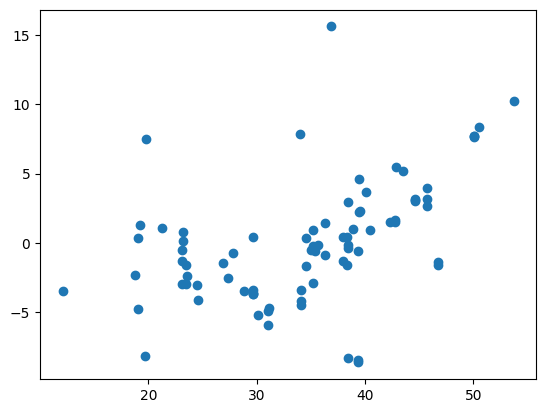

In [52]:
plt.scatter(y,error)

# ZERO RESUDUAL MEAN


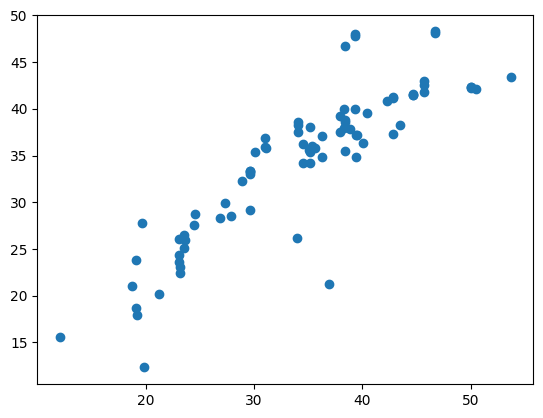

In [53]:
plt.scatter(y,ypred)

# SATS MODEL

In [54]:
import statsmodels.formula.api as smf

In [55]:
model1=smf.ols(formula='MPG~HP+VOL+SP+WT',data=df).fit()

In [56]:
model1.params

Intercept    30.677336
HP           -0.205444
VOL          -0.336051
SP            0.395627
WT            0.400574
dtype: float64

In [62]:
model1.aic


np.float64(477.9279049354879)

In [61]:
model1.bic

np.float64(489.9001507088501)

In [63]:
model1.rsquared

np.float64(0.7705372737359842)

In [64]:
model1.rsquared_adj

np.float64(0.7584602881431413)

# continous data transformatin= OPTIMIZATION

In [65]:
df1=df.copy()

In [71]:
df1["loghp"]=np.log(df["HP"])

In [72]:
df1["logvol"]=np.log(df["VOL"])

In [73]:
df1["logsp"]=np.log(df["SP"])

In [74]:
df1["logwt"]=np.log(df["WT"])

In [75]:
df1

,HP,MPG,VOL,SP,WT,loghp,logwt,logvol,logsp
0,49,53.700681,89,104.185353,28.762059,3.891820,3.359057,4.488636,4.646172
1,55,50.013401,92,105.461264,30.466833,4.007333,3.416639,4.521789,4.658344
2,55,50.013401,92,105.461264,30.193597,4.007333,3.407630,4.521789,4.658344
3,70,45.696322,92,113.461264,30.632114,4.248495,3.422049,4.521789,4.731461
4,53,50.504232,92,104.461264,29.889149,3.970292,3.397495,4.521789,4.648816
...,...,...,...,...,...,...,...,...,...
76,322,36.900000,50,169.598513,16.132947,5.774552,2.780864,3.912023,5.133434
77,238,19.197888,115,150.576579,37.923113,5.472271,3.635561,4.744932,5.014472
78,263,34.000000,50,151.598513,15.769625,5.572154,2.758086,3.912023,5.021236
79,295,19.833733,119,167.944460,39.423099,5.686975,3.674352,4.779123,5.123633


In [78]:
model2=smf.ols(formula='MPG~loghp+logwt+logvol+logsp',data=df1).fit()

In [85]:
print("AIC:",model2.aic,"BIC:",
      model2.bic,
      "rsquared",model2.rsquared,
      "rsquared_adj:",model2.rsquared_adj)

AIC: 400.5013350503872 BIC: 412.4735808237494 rsquared 0.9117779418023276 rsquared_adj: 0.9071346755813975


In [86]:
ypred=model2.predict()

In [87]:
ypred

array([53.09319559, 48.78662012, 49.002363  , 45.41382485, 49.87905231,
       45.5986421 , 48.9114164 , 49.48756042, 48.72649765, 41.97630558,
       42.7830023 , 45.6627914 , 40.33004341, 42.77069442, 44.40782216,
       42.58710068, 42.70234459, 45.00221886, 42.38530734, 38.7763892 ,
       38.70538518, 40.37260824, 38.29858231, 39.83121609, 38.89131002,
       43.16527541, 38.1528427 , 38.33018975, 45.00112623, 35.04052732,
       36.91904256, 37.03423976, 35.80120382, 34.52571421, 38.07627204,
       36.91489437, 37.31350771, 34.97652421, 34.34031714, 32.42956948,
       33.96174571, 34.21922026, 34.09186538, 35.62281358, 34.92206794,
       33.99760884, 33.60431451, 33.93450401, 32.85782832, 29.20465315,
       29.38031045, 29.2202333 , 28.87993573, 26.40638288, 26.49405753,
       28.03220759, 31.77219549, 29.72851448, 31.71982876, 31.53507628,
       27.07956189, 26.09666619, 24.16254493, 24.36302345, 23.65117034,
       29.62395384, 23.26145547, 23.27353884, 23.2641445 , 22.88

In [88]:
mean_absolute_error(y,ypred)

np.float64(1.5542846392863303)

# Drop OUTLIERS

In [89]:
modelf=model2.get_influence()

In [91]:
modelf.cooks_distance

(array([1.53308766e-03, 2.78878906e-03, 1.66237815e-03, 1.71698793e-04,
        9.20195406e-04, 1.95033028e-05, 1.98753830e-03, 3.57370622e-02,
        2.76403565e-02, 8.47877155e-05, 3.06968193e-03, 1.70861464e-01,
        1.42742209e-03, 3.21580287e-03, 1.75381418e-03, 6.94967187e-03,
        8.77923649e-06, 1.04579279e-01, 1.25433190e-04, 1.81433746e-05,
        6.52339051e-05, 6.61717407e-03, 2.45684635e-07, 3.83062016e-04,
        3.29161509e-04, 6.99771983e-02, 1.65954853e-04, 5.92591121e-06,
        4.14670532e-03, 1.10555287e-04, 9.66424565e-03, 3.08026474e-03,
        2.36679057e-04, 2.61593571e-03, 2.76128737e-03, 6.38876115e-04,
        2.07221313e-04, 5.57412929e-04, 1.76442964e-04, 9.43157589e-04,
        8.21133148e-04, 4.96592686e-04, 5.93699052e-07, 2.89115918e-04,
        5.33365415e-04, 1.63649638e-04, 4.20873829e-04, 5.87326524e-04,
        1.67087571e-03, 2.69338856e-04, 6.13523706e-05, 2.39205032e-04,
        8.02417090e-04, 8.16081096e-03, 1.09804626e-04, 3.091595

In [93]:
dis,_=modelf.cooks_distance

In [94]:
dis

array([1.53308766e-03, 2.78878906e-03, 1.66237815e-03, 1.71698793e-04,
       9.20195406e-04, 1.95033028e-05, 1.98753830e-03, 3.57370622e-02,
       2.76403565e-02, 8.47877155e-05, 3.06968193e-03, 1.70861464e-01,
       1.42742209e-03, 3.21580287e-03, 1.75381418e-03, 6.94967187e-03,
       8.77923649e-06, 1.04579279e-01, 1.25433190e-04, 1.81433746e-05,
       6.52339051e-05, 6.61717407e-03, 2.45684635e-07, 3.83062016e-04,
       3.29161509e-04, 6.99771983e-02, 1.65954853e-04, 5.92591121e-06,
       4.14670532e-03, 1.10555287e-04, 9.66424565e-03, 3.08026474e-03,
       2.36679057e-04, 2.61593571e-03, 2.76128737e-03, 6.38876115e-04,
       2.07221313e-04, 5.57412929e-04, 1.76442964e-04, 9.43157589e-04,
       8.21133148e-04, 4.96592686e-04, 5.93699052e-07, 2.89115918e-04,
       5.33365415e-04, 1.63649638e-04, 4.20873829e-04, 5.87326524e-04,
       1.67087571e-03, 2.69338856e-04, 6.13523706e-05, 2.39205032e-04,
       8.02417090e-04, 8.16081096e-03, 1.09804626e-04, 3.09159501e-05,
      

<StemContainer object of 3 artists>

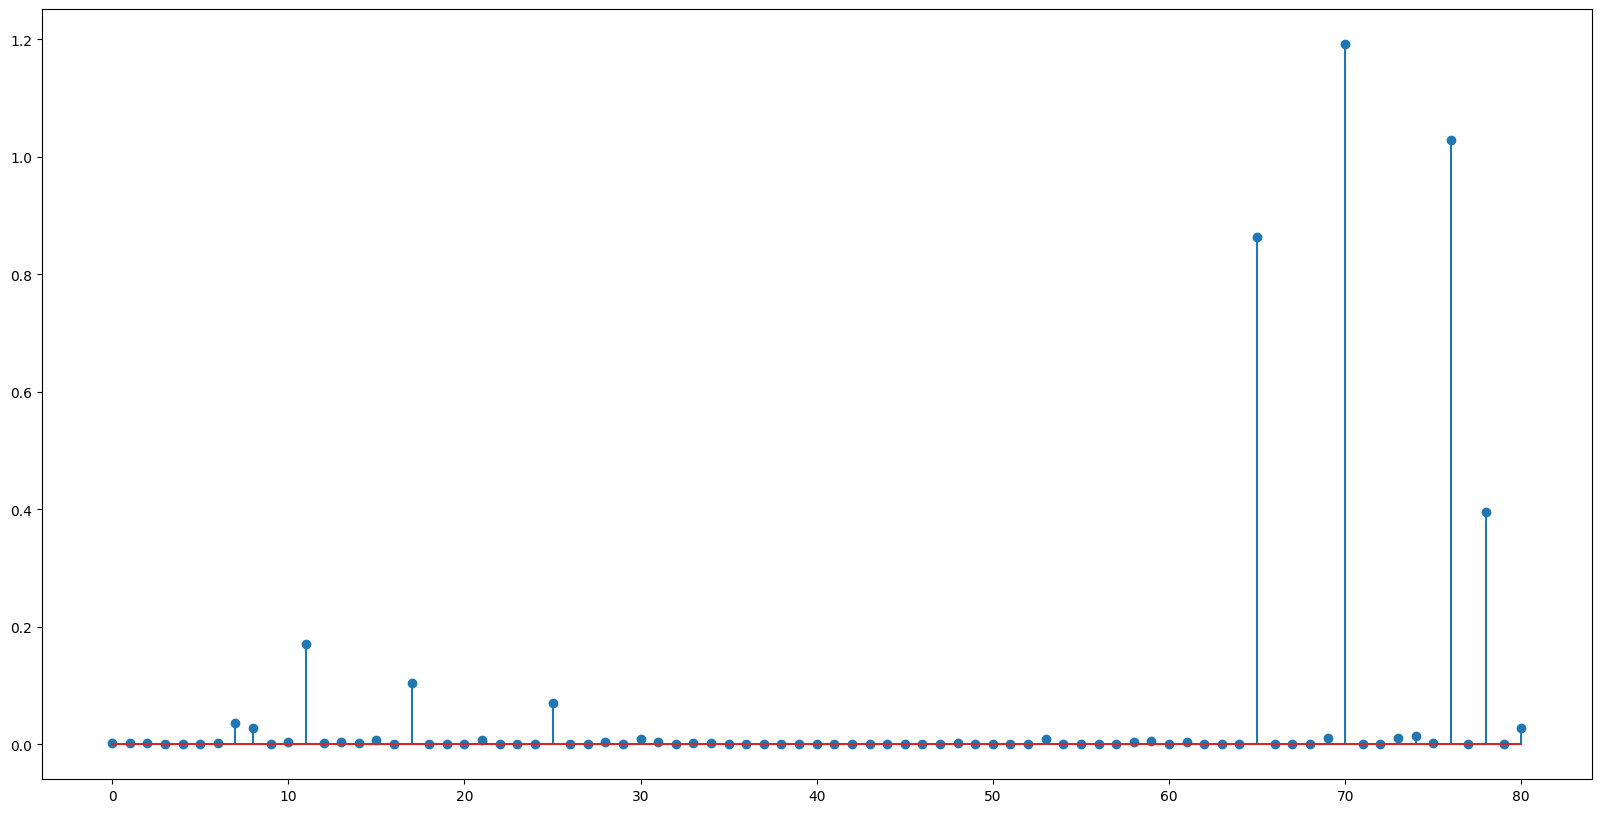

In [97]:
plt.figure(figsize=(20,10))
plt.stem(dis)

In [98]:
df1["dis"]=dis

In [99]:
df1

,HP,MPG,VOL,SP,WT,loghp,logwt,logvol,logsp,dis
0,49,53.700681,89,104.185353,28.762059,3.891820,3.359057,4.488636,4.646172,0.001533
1,55,50.013401,92,105.461264,30.466833,4.007333,3.416639,4.521789,4.658344,0.002789
2,55,50.013401,92,105.461264,30.193597,4.007333,3.407630,4.521789,4.658344,0.001662
3,70,45.696322,92,113.461264,30.632114,4.248495,3.422049,4.521789,4.731461,0.000172
4,53,50.504232,92,104.461264,29.889149,3.970292,3.397495,4.521789,4.648816,0.000920
...,...,...,...,...,...,...,...,...,...,...
76,322,36.900000,50,169.598513,16.132947,5.774552,2.780864,3.912023,5.133434,1.028958
77,238,19.197888,115,150.576579,37.923113,5.472271,3.635561,4.744932,5.014472,0.000849
78,263,34.000000,50,151.598513,15.769625,5.572154,2.758086,3.912023,5.021236,0.395403
79,295,19.833733,119,167.944460,39.423099,5.686975,3.674352,4.779123,5.123633,0.000185


In [113]:
df1.sort_values(by="dis",ascending=False)

,HP,MPG,VOL,SP,WT,loghp,logwt,logvol,logsp,dis
70,280,19.678507,50,164.598513,15.823060,5.634790,2.761468,3.912023,5.103509,1.191768e+00
76,322,36.900000,50,169.598513,16.132947,5.774552,2.780864,3.912023,5.133434,1.028958e+00
65,165,40.050000,50,126.598513,15.712859,5.105945,2.754479,3.912023,4.841021,8.635225e-01
78,263,34.000000,50,151.598513,15.769625,5.572154,2.758086,3.912023,5.021236,3.954031e-01
11,92,39.354094,50,117.598513,15.753535,4.521789,2.757065,3.912023,4.767276,1.708615e-01
...,...,...,...,...,...,...,...,...,...,...
27,92,38.411003,99,119.105055,32.835069,4.521789,3.491497,4.595120,4.780006,5.925911e-06
64,150,23.605158,121,128.128401,40.159482,5.010635,3.692859,4.795791,4.853033,2.587653e-06
72,162,23.203569,132,133.140074,43.353123,5.087596,3.769379,4.882802,4.891402,2.462343e-06
42,102,34.070668,92,117.461264,30.527427,4.624973,3.418626,4.521789,4.766109,5.936991e-07


In [114]:
df2=df1.sort_values(by="dis",ascending=False)

### Removing

In [119]:
df2=df2.drop([76,70,65,78])

In [120]:
df2

,HP,MPG,VOL,SP,WT,loghp,logwt,logvol,logsp,dis
11,92,39.354094,50,117.598513,15.753535,4.521789,2.757065,3.912023,4.767276,1.708615e-01
17,92,39.354094,50,117.598513,16.194122,4.521789,2.784648,3.912023,4.767276,1.045793e-01
25,92,38.411003,50,114.598513,16.043175,4.521789,2.775284,3.912023,4.741435,6.997720e-02
7,62,46.716554,50,102.598513,15.847758,4.127134,2.763028,3.912023,4.630823,3.573706e-02
80,236,12.101263,107,139.840817,34.948615,5.463832,3.553879,4.672829,4.940505,2.769605e-02
...,...,...,...,...,...,...,...,...,...,...
27,92,38.411003,99,119.105055,32.835069,4.521789,3.491497,4.595120,4.780006,5.925911e-06
64,150,23.605158,121,128.128401,40.159482,5.010635,3.692859,4.795791,4.853033,2.587653e-06
72,162,23.203569,132,133.140074,43.353123,5.087596,3.769379,4.882802,4.891402,2.462343e-06
42,102,34.070668,92,117.461264,30.527427,4.624973,3.418626,4.521789,4.766109,5.936991e-07


In [121]:
model3=smf.ols(formula='MPG~loghp+logwt+logvol+logsp',data=df2).fit()

In [122]:
print("AIC:",model3.aic,"BIC:",
      model3.bic,
      "rsquared",model3.rsquared,
      "rsquared_adj:",model3.rsquared_adj)

AIC: 247.27860712411217 BIC: 258.9976342333806 rsquared 0.9846842125382428 rsquared_adj: 0.9838333354570341


# LOGISTICREGRESSION

In [123]:
data=pd.read_csv("Claimants.csv")

In [124]:
data

,CASENUM,ATTORNEY,CLMSEX,CLMINSUR,SEATBELT,CLMAGE,LOSS
0,5,0,0.0,1.0,0.0,50.0,34.940
1,3,1,1.0,0.0,0.0,18.0,0.891
2,66,1,0.0,1.0,0.0,5.0,0.330
3,70,0,0.0,1.0,1.0,31.0,0.037
4,96,1,0.0,1.0,0.0,30.0,0.038
...,...,...,...,...,...,...,...
1335,34100,1,0.0,1.0,0.0,NaN,0.576
1336,34110,0,1.0,1.0,0.0,46.0,3.705
1337,34113,1,1.0,1.0,0.0,39.0,0.099
1338,34145,0,1.0,0.0,0.0,8.0,3.177


In [126]:
data.dtypes

CASENUM       int64
ATTORNEY      int64
CLMSEX      float64
CLMINSUR    float64
SEATBELT    float64
CLMAGE      float64
LOSS        float64
dtype: object

In [128]:
data.describe()

,CASENUM,ATTORNEY,CLMSEX,CLMINSUR,SEATBELT,CLMAGE,LOSS
count,1340.000000,1340.000000,1328.000000,1299.000000,1292.000000,1151.000000,1340.000000
mean,11202.001493,0.488806,0.558735,0.907621,0.017028,28.414422,3.806307
std,9512.750796,0.500061,0.496725,0.289671,0.129425,20.304451,10.636903
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4177.000000,0.000000,0.000000,1.000000,0.000000,9.000000,0.400000
50%,8756.500000,0.000000,1.000000,1.000000,0.000000,30.000000,1.069500
75%,15702.500000,1.000000,1.000000,1.000000,0.000000,43.000000,3.781500
max,34153.000000,1.000000,1.000000,1.000000,1.000000,95.000000,173.604000


In [129]:
data.isna().sum()

CASENUM       0
ATTORNEY      0
CLMSEX       12
CLMINSUR     41
SEATBELT     48
CLMAGE      189
LOSS          0
dtype: int64

In [131]:
data["CLMSEX"].unique()

array([ 0.,  1., nan])

In [134]:
data["CLMSEX"]=data["CLMSEX"].fillna(1)

In [136]:
data["CLMINSUR"].unique()

array([ 1.,  0., nan])

In [137]:
data["CLMINSUR"]=data["CLMINSUR"].fillna(1.)

In [140]:
data["SEATBELT"].unique()

array([ 0.,  1., nan])

In [141]:
data["SEATBELT"]=data["SEATBELT"].fillna(1.)

In [142]:
data["CLMAGE"].unique()

array([50., 18.,  5., 31., 30., 35.,  9., 34., 60., nan, 37., 41.,  7.,
       40., 58.,  3., 38., 39., 54., 61.,  0., 16., 17., 33., 46., 55.,
        1., 19., 10., 44.,  4., 56., 63., 47., 57., 11.,  8., 71.,  6.,
       43., 69., 48., 75., 80., 66., 13., 51., 15., 65., 14., 49., 77.,
       36., 45., 53., 59., 67., 83., 64., 70., 73., 95., 88., 78., 84.,
       68., 74., 86., 76.])

In [143]:
data["CLMAGE"].mean()

np.float64(28.414422241529106)

In [144]:
data["CLMAGE"]=data["CLMAGE"].fillna(data["CLMAGE"].mean())

In [145]:
data.isna().sum()


CASENUM     0
ATTORNEY    0
CLMSEX      0
CLMINSUR    0
SEATBELT    0
CLMAGE      0
LOSS        0
dtype: int64

# X & Y

In [146]:
y=data["ATTORNEY"]

In [148]:
x=data.drop(["ATTORNEY"],axis=1)

### TEST TRAIN METHOD

In [150]:
from sklearn.model_selection import train_test_split

In [151]:
xtr,xts,ytr,yts=train_test_split(x,y,train_size=0.80,random_state=5)

### MODEL BUILDING

In [158]:
      from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score,recall_score

In [154]:
model4=LogisticRegression()

In [155]:
model4.fit(xtr,ytr)

C:\Users\samsu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
TRAIN

In [159]:
ytrp=model4.predict(xtr)

In [160]:
ytsp=model4.predict(xts)

In [161]:
accuracy_score(ytr,ytrp)

0.7005597014925373

In [163]:
accuracy_score(yts,ytsp)

0.7126865671641791

In [164]:
confusion_matrix(yts,ytsp)


array([[94, 50],
       [27, 97]])

In [165]:
precision_score(yts,ytsp)

np.float64(0.6598639455782312)

In [166]:
 recall_score(yts,ytsp)

np.float64(0.782258064516129)

# Decision Tree

In [167]:
y=data["ATTORNEY"]

In [171]:
x1=data.drop(labels=["ATTORNEY","CASENUM"],axis=1)

In [172]:
x1

,CLMSEX,CLMINSUR,SEATBELT,CLMAGE,LOSS
0,0.0,1.0,0.0,50.000000,34.940
1,1.0,0.0,0.0,18.000000,0.891
2,0.0,1.0,0.0,5.000000,0.330
3,0.0,1.0,1.0,31.000000,0.037
4,0.0,1.0,0.0,30.000000,0.038
...,...,...,...,...,...
1335,0.0,1.0,0.0,28.414422,0.576
1336,1.0,1.0,0.0,46.000000,3.705
1337,1.0,1.0,0.0,39.000000,0.099
1338,1.0,0.0,0.0,8.000000,3.177


In [173]:
xtr,xts,ytr,yts=train_test_split(x1,y,train_size=0.70,random_state=10)

In [174]:
xtr.shape

(937, 5)

In [182]:
from sklearn.tree import DecisionTreeClassifier

In [183]:
model5=DecisionTreeClassifier()

In [189]:
model5.fit(xtr,ytr)

DecisionTreeClassifier()

In [190]:
ytrp=model5.predict(xtr)

In [191]:
ytrp

array([1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1,
       1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0,
       1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0,
       0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1,

In [192]:
ytrs=model5.predict(xts)

In [193]:
ytrs

array([0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1,
       0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0,
       1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1,
       1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0,
       0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0,
       0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0,
       1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0,

In [194]:
accuracy_score(ytr,ytrp)

0.9967982924226254

In [195]:
accuracy_score(yts,ytsp)

0.6104218362282878

In [199]:
from sklearn.tree import plot_tree

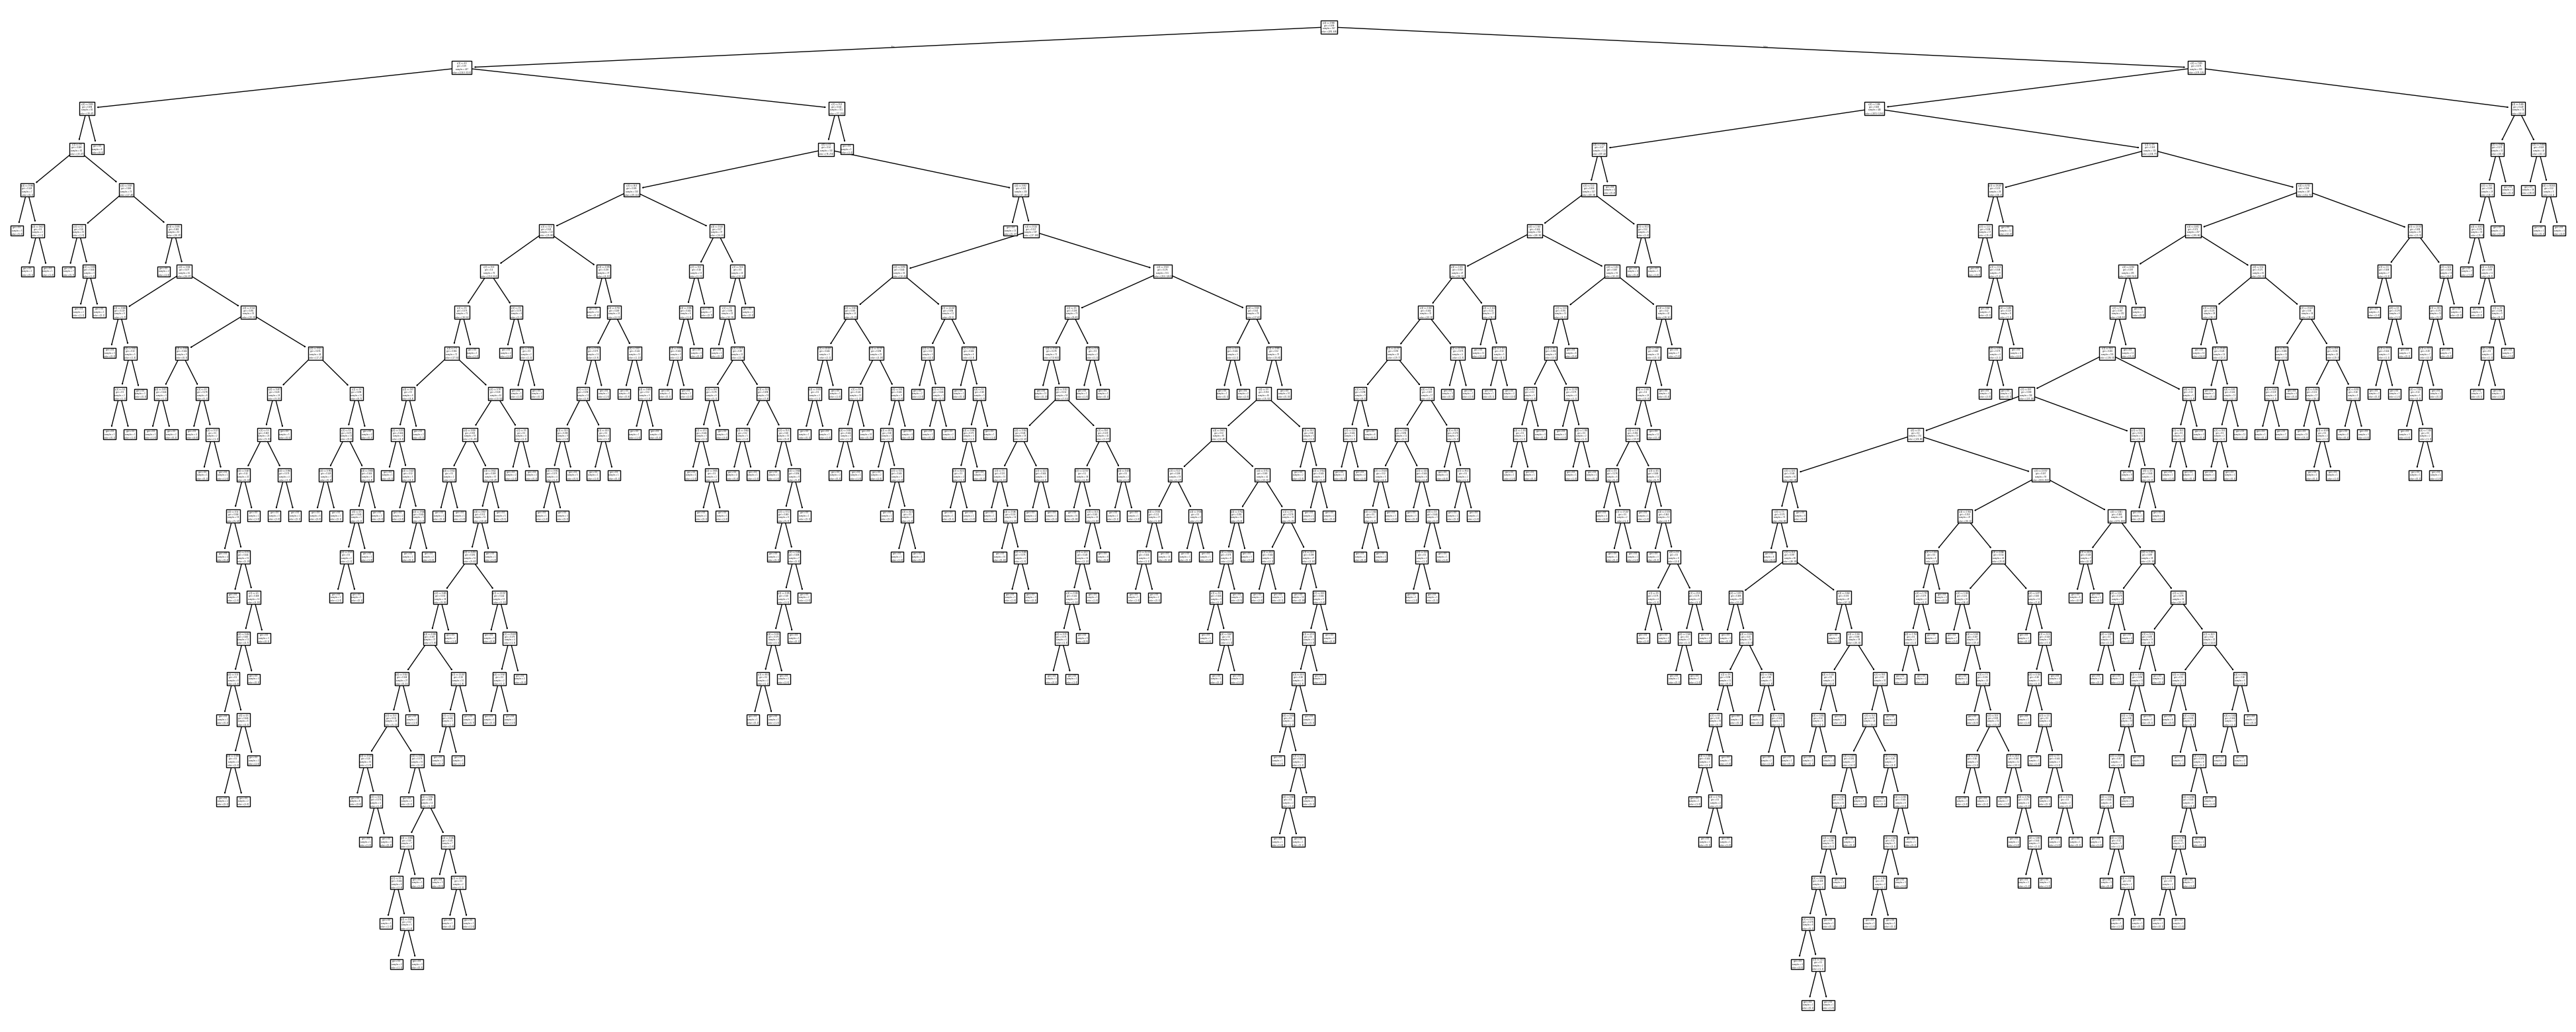

In [205]:
plt.figure(figsize=(50,20))
plot_tree(decision_tree=model5)
plt.show()

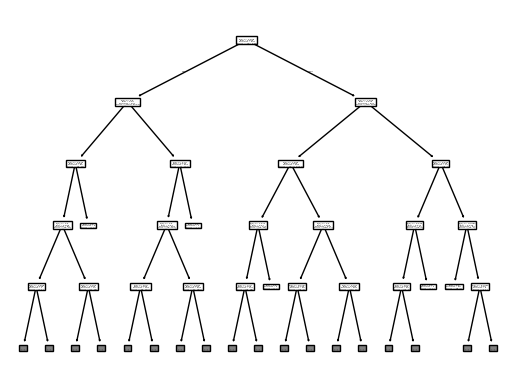

In [208]:
tree.plot_tree(model5,max_depth=4)
plt.show()

In [213]:
model6=DecisionTreeClassifier(max_depth=4)

In [214]:
model6.fit(xtr,ytr)

DecisionTreeClassifier(max_depth=4)

In [215]:
ytrp=model6.predict(xtr)

In [216]:
ytsp=model6.predict(xts)

In [217]:
accuracy_score(ytr,ytrp)

0.7620064034151548

In [218]:
accuracy_score(yts,ytsp)

0.6997518610421837

# Grid Search CV

In [219]:
from sklearn.model_selection import GridSearchCV

In [221]:
model7=GridSearchCV(estimator=model5,param_grid={"criterion":["gini","entropy"],"max_depth":[1,2,3,4,5,6,7,8,9,10]},cv=5)

In [222]:
model7.fit(xtr,ytr)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]})

In [225]:
print(model7.best_params_)

{'criterion': 'gini', 'max_depth': 1}


In [226]:
print(model7.best_score_)

0.7385140516554785
